# Soluciones de Ciencia de Datos para el caso del Titanic


### Este cuaderno es un complemento del libro. [Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312). 

El cuaderno nos guía a través de un flujo de trabajo típico para resolver competencias de ciencia de datos en sitios como Kaggle.

Hay varios cuadernos excelentes para estudiar las entradas a la competencia de ciencia de datos. Sin embargo, muchos omitirán parte de la explicación sobre cómo se desarrolla la solución, ya que estos cuadernos son desarrollados por expertos para expertos. El objetivo de este cuaderno es seguir un flujo de trabajo paso a paso, explicando cada paso y la justificación de cada decisión que tomamos durante el desarrollo de la solución..

## Etapas del flujo de trabajo

El flujo de trabajo de la solución pasa por siete etapas descritas en el libro Soluciones de ciencia de datos.

1. Definición de pregunta o problema.
2. Adquirir datos de prueba y entrenamiento.
3. Discutir, preparar, limpiar los datos.
4. Analizar, identificar patrones y explorar los datos..
5. Modelar, predecir y resolver el problema.
6. Visualice, informe y presente los pasos de resolución de problemas y la solución final..
7. Suministrar o enviar los resultados.

El flujo de trabajo indica la secuencia general de cómo cada etapa puede seguir a la otra. Sin embargo, hay casos de uso con excepciones.

- Podemos combinar múltiples etapas de flujo de trabajo. Podemos analizar visualizando datos.
- Realizar una etapa antes de lo indicado. Podemos analizar datos antes y después de discutir.
- Realice una etapa varias veces en nuestro flujo de trabajo. Visualize stage puede usarse varias veces.
- Suelta un escenario por completo. Es posible que no necesitemos una etapa de suministro para producir o habilitar el servicio para nuestro conjunto de datos para una competencia.


## Preguntas y definicion del problema

Los sitios de competencia como Kaggle definen el problema que se debe resolver o las preguntas que se deben formular mientras proporcionan los conjuntos de datos para entrenar su modelo de ciencia de datos y probar los resultados del modelo con un conjunto de datos de prueba. La pregunta o la definición del problema para la competencia Titanic Survival es [descrita aquí en Kaggle](https://www.kaggle.com/c/titanic).

> Sabiendo a partir de un conjunto de muestras de entrenamiento que enumera a los pasajeros que sobrevivieron o no al desastre del Titanic, ¿puede nuestro modelo determinar en base a un conjunto de datos de prueba dado que no contiene la información de supervivencia, si estos pasajeros en el conjunto de datos de prueba sobrevivieron o no?.

También es posible que deseemos desarrollar una comprensión temprana sobre el dominio de nuestro problema. Esto se describe en la [página de descripción de la competencia de Kaggle aquí](https://www.kaggle.com/c/titanic). Here are the highlights to note.

- El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg, matando a 1502 de los 2224 pasajeros y tripulación. Esto significa una tasa de supervivencia del 32%.
- Una de las razones por las que el naufragio provocó tantas pérdidas de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación.
- Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como mujeres, niños y la clase alta.

## Objetivos de flujo de trabajo

El flujo de trabajo de las soluciones de ciencia de datos resuelve siete objetivos principales.

**Clasificando.**Es posible que queramos clasificar o categorizar nuestras muestras. También es posible que deseemos comprender las implicaciones o la correlación de diferentes clases con nuestro objetivo de solución.

**Correlacionando.** Se puede abordar el problema en función de las características disponibles dentro del conjunto de datos de entrenamiento. ¿Qué características dentro del conjunto de datos contribuyen significativamente a nuestro objetivo de solución? Hablando estadísticamente, ¿existe una [correlación] (https://en.wikiversity.org/wiki/Correlation) entre una función y un objetivo de solución? A medida que cambian los valores de las funciones, ¿cambia también el estado de la solución y viceversa? Esto se puede probar tanto para características numéricas como categóricas en el conjunto de datos dado. También es posible que deseemos determinar la correlación entre características distintas de la supervivencia para los objetivos posteriores y las etapas del flujo de trabajo. Correlacionar ciertas características puede ayudar a crear, completar o corregir características.

**Convirtiendo.** Para la etapa de modelado, es necesario preparar los datos. Dependiendo de la elección del algoritmo del modelo, se puede requerir que todas las características se conviertan a valores numéricos equivalentes. Entonces, por ejemplo, convertir valores categóricos de texto en valores numéricos.

**Completando.** La preparación de datos también puede requerir que estimemos los valores faltantes dentro de una característica. Los algoritmos de modelo pueden funcionar mejor cuando no hay valores perdidos.

**De corrección.** También podemos analizar el conjunto de datos de entrenamiento dado en busca de errores o posibles valores inexactos dentro de las características e intentar corregir estos valores o excluir las muestras que contienen los errores. Una forma de hacer esto es detectar cualquier valor atípico entre nuestras muestras o características. También podemos descartar por completo una función si no contribuye al análisis o puede sesgar significativamente los resultados..

**Creando.** ¿Podemos crear nuevas características basadas en una característica existente o un conjunto de características, de modo que la nueva característica siga los objetivos de correlación, conversión e integridad?.

**Gráficos.** Cómo seleccionar las gráficas y gráficos de visualización correctos según la naturaleza de los datos y los objetivos de la solución.

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Adquirir datos

Los paquetes de Python Pandas nos ayudan a trabajar con nuestros conjuntos de datos. Comenzamos adquiriendo los conjuntos de datos de entrenamiento y prueba en Pandas DataFrames. También combinamos estos conjuntos de datos para ejecutar ciertas operaciones en ambos conjuntos de datos juntos.

In [4]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')
combine = [train_df, test_df]

## Analizar describiendo datos

Pandas también ayuda a describir los conjuntos de datos que responden a las siguientes preguntas al principio de nuestro proyecto.

**¿Qué caracteristicas están disponibles en el conjunto de datos?**

Anotar los nombres de las características para manipularlos o analizarlos directamente. Estos nombres de funciones se describen en la [página de datos de Kaggle aquí](https://www.kaggle.com/c/titanic/data).

In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**¿Qué características son categóricas?**

Estos valores clasifican las muestras en conjuntos de muestras similares. Dentro de las características categóricas, ¿se basan los valores nominales, ordinales, de razón o de intervalo? Entre otras cosas, esto nos ayuda a seleccionar los gráficos apropiados para la visualización..

- Categórico: sobreviviente, sexo y embarcado. Ordinal: Pclass (clase de pasajero).

**¿Qué características son numéricas?**

¿Qué características son numéricas? Estos valores cambian de una muestra a otra. Dentro de las características numéricas, ¿los valores son discretos, continuos o basados en series de tiempo? Entre otras cosas, esto nos ayuda a seleccionar las gráficas adecuadas para la visualización..

- Continua: Age (Edad), Fare (Ticket). Discreta: SibSp (hermanos/as, esposo/a), Parch (Número de padres / niños a bordo).

In [6]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**¿Qué características son tipos de datos mixtos?**

Datos numéricos y alfanuméricos dentro de la misma función. Estos son candidatos para corregir el objetivo.

- Ticket es una combinación de tipos de datos numéricos y alfanuméricos. La cabina es alfanumérica.

**¿Qué funciones pueden contener errores o errores tipográficos?**

Esto es más difícil de revisar para un conjunto de datos grande; sin embargo, revisar algunas muestras de un conjunto de datos más pequeño puede decirnos directamente qué características pueden requerir corrección.

- La característica nombre puede contener errores o errores tipográficos, ya que hay varias formas de describir un nombre, incluidos títulos, corchetes y comillas que se utilizan para nombres alternativos o cortos..

In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**¿Qué características contienen valores en blanco, nulos o vacíos?**

Estos requerirán ser corregidos.

- Cabin> Age> (Cabina> Edad>) La característica embarcado contiene una cantidad de valores nulos en ese orden para el conjunto de datos de entrenamiento.
- Cabin> Age están incompletos en el caso del conjunto de datos de prueba.

**¿Cuáles son los tipos de datos para varias características?**

Ayudandonos durante la persecución de la meta.

- Siete características son números enteros o flotantes. Seis en el caso del conjunto de datos de prueba.
- Cinco características son strings (objeto).

In [8]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**¿Cuál es la distribución de valores de características numéricas en las muestras?**

Esto nos ayuda a determinar, entre otras ideas iniciales, qué tan representativo es el conjunto de datos de entrenamiento del dominio del problema real..

- Las muestras totales son 891 o el 40% del número real de pasajeros a bordo del Titanic (2,224).
- Sobreviviviente es una característica categórica con valores 0 o 1.
- Alrededor del 38% de la muestra de sobreviviente es representativa de la tasa de supervivencia real del 32%.
- La mayoría de los pasajeros (> 75%) no viajaron con padres o hijos.
- Casi el 30% de los pasajeros tenían hermanos y / o cónyuge a bordo.
- Las tarifas variaron significativamente y pocos pasajeros (<1%) pagaron tan alto como $512.
- Pocas pasajeros mayores (<1%) dentro del rango de edad de 65-80.

In [9]:
train_df.describe()
# Revisión de la tasa de supervivencia utilizando `percentiles=[.61, .62]` sabiendo que la descripción de nuestro problema menciona una tasa de supervivencia del 38%.
# Revision de la distribución de Número de padres/niños a bordo (Parch) usando `percentiles=[.75, .8]`
# Destribución de Hermanos/as (SibSp) `[.68, .69]`
# Edad y Ticket (Age and Fare) `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**¿Cuál es la distribución de características categóricas?**

- Los nombres son únicos en todo el conjunto de datos (count=unique=891)
- Variable sexo con dos valores posibles con 65% de hombres (top=male, freq=577/count=891).
- Los valores de cabina tienen varios duplicados en las muestras. Alternativamente, varios pasajeros compartieron una cabina.
- Embarked toma tres valores posibles. Puerto S (Southampton) utilizado por la mayoría de los pasajeros (top=S)
- La característica Ticket tiene una alta proporción (22%) de valores duplicados (unique=681).

In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wick, Mrs. George Dennick (Mary Hitchcock)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### Supuestos basados ​​en análisis de datos

Llegamos a los siguientes supuestos basados ​​en el análisis de datos realizado hasta ahora. Podemos validar estas suposiciones aún más antes de tomar las medidas adecuadas..

**Correlaciones.**

Queremos saber qué tan bien se correlaciona cada característica con Survival. Queremos hacer esto al principio de nuestro proyecto y hacer coincidir estas correlaciones rápidas con correlaciones modeladas más adelante en el proyecto..

**Completing.**

1. Es posible que deseemos completar la función Edad, ya que definitivamente está correlacionada con la supervivencia..
2. Es posible que queramos completar la función Embarcked (Embarcado), ya que también puede correlacionarse con la supervivencia u otra característica importante.

**Corrigiendo.**

1. La función de ticket puede eliminarse de nuestro análisis ya que contiene una alta proporción de duplicados (22%) y puede que no haya una correlación entre el ticket y la supervivencia..
2. La característica Cabin (cabina) puede descartarse porque está muy incompleta o contiene muchos valores nulos tanto en el conjunto de datos de entrenamiento como de prueba.
3. PassengerId puede eliminarse del conjunto de datos de entrenamiento ya que no contribuye a la supervivencia.
4. La característica del nombre es relativamente no estándar, puede que no contribuya directamente a la supervivencia, por lo que tal vez se elimine.

**Creando.**

1.Es posible que deseemos crear una nueva característica llamada Family basada en Parch y SibSp para obtener el recuento total de miembros de la familia a bordo.
2. Es posible que deseemos diseñar la característica Name para extraer el título como una nueva característica.
3. Es posible que queramos crear una nueva característica para las Age band (bandas de edad). Esto convierte una característica numérica continua en una característica categórica ordinal.
4. También es posible que deseemos crear una característica de rango de tarifa por si ayuda a nuestro análisis.

**Clasificación.**

También podemos agregar a nuestras suposiciones en función de la descripción del problema que se señaló anteriormente.

1. Las mujeres (sexo = mujer) tenían más probabilidades de haber sobrevivido.
2. Los niños Age <? (edad <?) tenían más probabilidades de haber sobrevivido. 
3. Los pasajeros de clase alta (Pclass = 1) tenían más probabilidades de haber sobrevivido.

## Analísis pivoteando características

Para confirmar algunas de nuestras observaciones y suposiciones, podemos analizar rápidamente nuestras correlaciones de características haciendo pivotar las características entre sí. Solo podemos hacerlo en esta etapa para las características que no tienen valores vacíos. También tiene sentido hacerlo solo para características que son de tipo categórico (Sex), ordinal (Pclass) o discreto (SibSp, Parch).

- **Pclass** Observamos una correlación significativa (> 0.5) entre Pclass = 1 y Survived (clasificación # 3). Decidimos incluir esta característica en nuestro modelo.
- **Sex** Confirmamos la observación durante la definición del problema de que Sex = mujer tuvo una tasa de supervivencia muy alta del 74% (clasificación # 1).
- **SibSp y Parch** Estas características tienen correlación cero para ciertos valores. Puede ser mejor derivar una característica o un conjunto de características de estas características individuales (creando # 1).

In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analísis mediante la visualizando de datos

Ahora podemos continuar confirmando algunas de nuestras suposiciones usando visualizaciones para analizar los datos.

### Correlacionar características numéricas

Comencemos por comprender las correlaciones entre las características numéricas y nuestro objetivo de solución (Survived).

Un gráfico de histograma es útil para analizar variables numéricas continuas como Age (Edad), donde las bandas o rangos ayudarán a identificar patrones útiles. El histograma puede indicar la distribución de muestras utilizando contenedores definidos automáticamente o bandas de igual rango. Esto nos ayuda a responder preguntas relacionadas con bandas específicas (¿Tuvieron los bebés una mejor tasa de supervivencia?)

Tenga en cuenta que el eje x en las visualizaciones de historgrama representa el recuento de muestras o pasajeros.

**Observaciones.**

- Los bebés (edad <= 4) tuvieron una alta tasa de supervivencia.
- Las pasajeros más viejas (Edad = 80) sobrevivieron..
- Gran número de jóvenes de 15 a 25 años no sobrevivió.
- La mayoría de las pasajeros tienen entre 15 y 35 años.

**Decisiones.**

Este simple análisis confirma nuestras suposiciones como decisiones para las etapas posteriores del flujo de trabajo.

- Deberíamos considerar la edad (nuestra clasificación de suposición n. ° 2) en nuestro modelo de entrenamiento.
- Completar la función Edad para valores nulos (completando el n. ° 1).
- Deberíamos agrupar los grupos de edad (creando el n. ° 3).

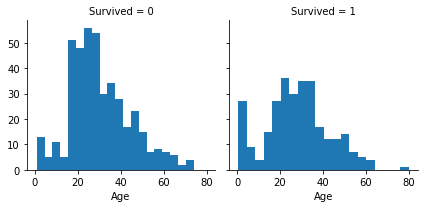

In [15]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Correlacionar características numéricas y ordinales

Podemos combinar múltiples características para identificar correlaciones usando un solo gráfico. Esto se puede hacer con características numéricas y categóricas que tienen valores numéricos..

**Observaciones.**

- Pclass = 3 tenía la mayoría de los pasajeros, sin embargo, la mayoría no sobrevivió. Confirma nuestro supuesto de clasificación n. ° 2.
- La mayoría de los pasajeros bebés de Pclass = 2 y Pclass = 3 sobrevivieron. Califica aún más nuestro supuesto de clasificación n. ° 2.
- La mayoría de los pasajeros de Pclass = 1 sobrevivieron. Confirma nuestro supuesto de clasificación n. ° 3.
- Pclass varía en términos de distribución por edad de los pasajeros.

**Decisiones.**

- Considerar Pclass para el entrenamiento del modelo.

/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


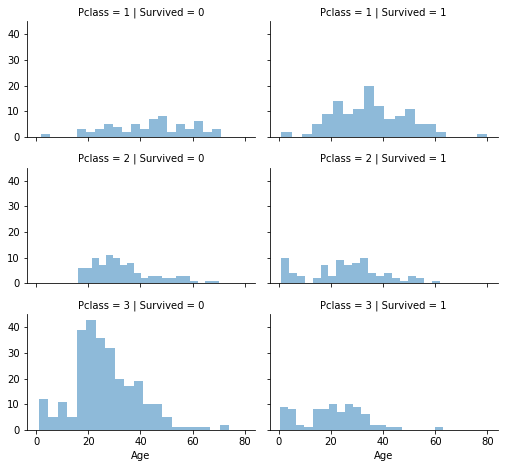

In [16]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlacionando características categóricas

Ahora podemos correlacionar características categóricas con nuestra solución objetivo.

**Observaciones.**

- Las pasajeras tenían una tasa de supervivencia mucho mejor que los hombres. Confirma la clasificación (# 1).
- Excepción en Embarked = C donde los hombres tuvieron una mayor tasa de supervivencia. Esto podría ser una correlación entre Pclass y Embarked y, a su vez, Pclass y Survived, no necesariamente una correlación directa entre Embarked y Survived.
- Los hombres tuvieron una mejor tasa de supervivencia en Pclass = 3 en comparación con Pclass = 2 para los puertos C y Q. Completando (# 2).
- Los puertos de embarque tienen diferentes tasas de supervivencia para Pclass = 3 y entre pasajeros masculinos. Correlación (# 1).

**Decisiones.**

- Agregar función de sexo al entrenamiento de modelos.
- Completar y agregar la función Embarked al entrenamiento de modelos.

/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


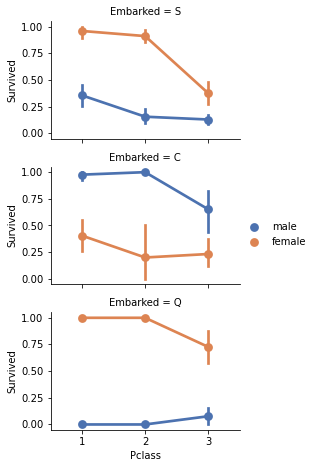

In [17]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlacionar características categóricas y numéricas

También es posible que deseemos correlacionar características categóricas (con valores no numéricos) y características numéricas. Podemos considerar correlacionar Embarcado (Categórico no numérico), Sexo (Categórico no numérico), Tarifa (Numérico continuo), con Sobreviviente (Categórico numérico).

**Observationes.**

- Los pasajeros que pagan tarifas más altas tienen una mejor supervivencia. Confirma nuestra suposición para crear (n. ° 4) rangos de tarifas.
- El puerto de embarque se correlaciona con las tasas de supervivencia. Confirma correlacionar (# 1) y completar (# 2).

**Decisiones.**

- Considere la función de bandas de tarifa.

/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


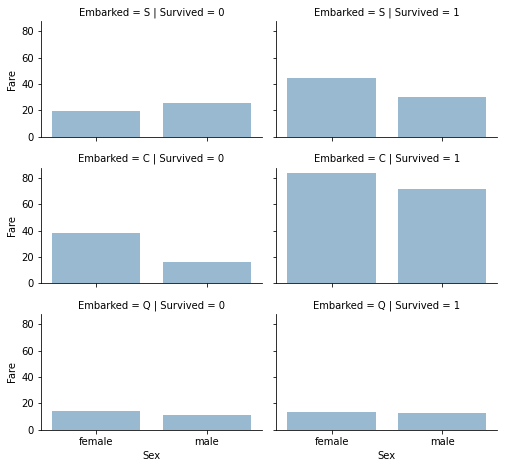

In [18]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Discusión sobre los datos

Hemos recopilado varias suposiciones y decisiones con respecto a nuestros conjuntos de datos y requisitos de solución. Hasta ahora, no tuvimos que cambiar una sola característica o valor para llegar a estos. Ejecutemos ahora nuestras decisiones y suposiciones para corregir, crear y completar metas..

### Corregir eliminando características

Este es un buen objetivo inicial para ejecutar. Al eliminar características, estamos tratando con menos puntos de datos. Acelera nuestro cuaderno y facilita el análisis.

Basándonos en nuestras suposiciones y decisiones, queremos eliminar las características de Cabin (corrigiendo el n. ° 2) y Ticket (corrigiendo el n. ° 1).

Tenga en cuenta que, cuando corresponda, realizamos operaciones en conjuntos de datos de entrenamiento y prueba juntos para mantener la coherencia.

In [19]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### Creando nueva característica extrayendo de una existente

Queremos analizar si la función Name se puede diseñar para extraer títulos y probar la correlación entre títulos y supervivencia, antes de eliminar las funciones Name y PassengerId.

En el siguiente código, extraemos la característica de Título usando expresiones regulares. El modelo RegEx `(\w+\.)` coincide con la primera palabra que termina con un carácter de punto dentro de la función Name. La bandera `expand = False` devuelve un DataFrame.

**Observaciones.**

Cuando graficamos Título, Edad y Sobreviviente, observamos las siguientes observaciones.

- La mayoría de los títulos clasifican los grupos de edad con precisión. Por ejemplo: el título de maestro tiene una edad media de 5 años.
- La supervivencia entre los grupos de edad del título varía ligeramente.
- Ciertos títulos sobrevivieron en su mayoría (Mme, Lady, Sir) o no (Don, Rev, Jonkheer).

**Decision.**

- Decidimos conservar la nueva característica Title (título) para el entrenamiento de modelos.

In [20]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Podemos reemplazar muchos títulos con un nombre más común o clasificarlos como `Rare`.

In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Podemos convertir los títulos categóricos a ordinales.

In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Ahora podemos eliminar de forma segura la función Nombre de los conjuntos de datos de entrenamiento y prueba. Tampoco necesitamos la función PassengerId en el conjunto de datos de entrenamiento.

In [23]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature

Ahora podemos convertir características que contienen strings en valores numéricos. Esto es requerido por la mayoría de los algoritmos de modelos. Hacerlo también nos ayudará a lograr el objetivo de completar funciones..

Comencemos por convertir la función Sex (sexo) en una nueva función llamada Gender (género) donde female=1 and male=0.

In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completando una característica continua numérica

Ahora deberíamos comenzar a estimar y completar características con valores faltantes o nulos. Primero haremos esto para la función Age (Edad).

Podemos considerar tres métodos para completar una característica continua numérica.

1. Una forma sencilla es generar números aleatorios entre la media y [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. Una forma más precisa de adivinar los valores perdidos es utilizar otras características correlacionadas. En nuestro caso notamos correlación entre Age, Gender, y Pclass. Adivinamos los valores de Age (edad) usando valores de [median] https://en.wikipedia.org/wiki/Median) para Age a través de la combinacion de los conjuntos Pclass y Gender. Entonces, la edad media para Pclass = 1 y Gender = 0, Pclass = 1 y Gender = 1, y así sucesivamente...

3. Combinamos los métodos 1 y 2. Entonces, en lugar de adivinar valores de edad basados en la mediana, usamos números aleatorios entre la media y la desviación estándar, basados en conjuntos de combinaciones de Pclass y Gender.

Los métodos 1 y 3 introducirán ruido aleatorio en nuestros modelos. Los resultados de varias ejecuciones pueden variar. Preferiremos el método 2.

/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


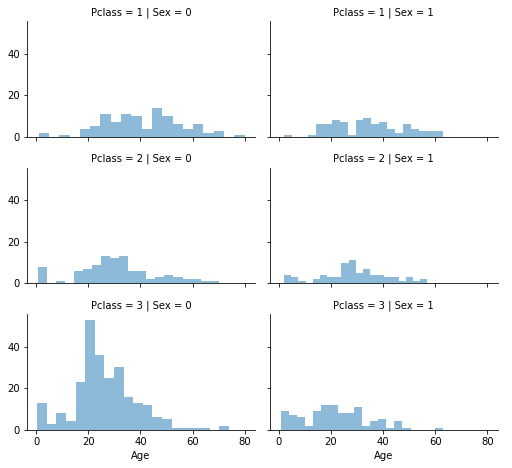

In [25]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Comencemos por preparar una matriz vacía para contener valores de Age (edad) adivinados basados en combinaciones de Pclass x Gender.

In [26]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Ahora iteramos sobre Sexo (0 o 1) y Pclass (1, 2, 3) para calcular los valores adivinados de Edad para las seis combinaciones.

In [27]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [28]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [29]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.

In [30]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Crear nueva característica combinando características existentes

Podemos crear una nueva función para FamilySize que combine Parch y SibSp. Esto nos permitirá eliminar Parch y SibSp de nuestros conjuntos de datos..

In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Dejemos las características de Parch, SibSp y FamilySize en favor de IsAlone.

In [33]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


También podemos crear una característica artificial combinando Pclass y Age.

In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completando una característica categórica

La característica Embarked toma valores S, Q, C según el puerto de embarque. Nuestro conjunto de datos de entrenamiento tiene dos valores perdidos. Simplemente los llenamos con la ocurrencia más común.

In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Convertir característica categórica a numérica

Ahora podemos convertir la característica EmbarkedFill creando una nueva característica Port numérica.

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Completar y convertir rápidamente una característica numérica

Ahora podemos completar la característica Fare (tarifa) para el valor faltante único en el conjunto de datos de prueba usando el modo para obtener el valor que ocurre con más frecuencia para esta característica. Hacemos esto en una sola línea de código..

Tenga en cuenta que no estamos creando una nueva característica intermedia ni realizando ningún análisis adicional de correlación para adivinar la característica faltante, ya que solo reemplazamos un valor. El objetivo de finalización logra el requisito deseado para que el algoritmo del modelo opere con valores no nulos.

También es posible que deseemos redondear la tarifa a dos decimales, ya que representa la moneda.

In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


We can not create FareBand.

In [39]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convierta la característica Fare (tarifa) en valores ordinales basados en FareBand.

In [40]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


And the test dataset.

In [41]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Modelar, predecir y resolver

Ahora estamos listos para entrenar un modelo y predecir la solución requerida. Hay más de 60 algoritmos de modelado predictivo para elegir. Debemos comprender el tipo de problema y el requisito de solución para limitarnos a unos pocos modelos seleccionados que podamos evaluar. Nuestro problema es un problema de clasificación y regresión. Queremos identificar la relación entre la salida (sobreviviente o no) con otras variables o características (género, edad, puerto ...). También estamos realizando una categoría de aprendizaje automático que se llama aprendizaje supervisado, ya que entrenamos nuestro modelo con un conjunto de datos determinado. Con estos dos criterios: aprendizaje supervisado más clasificación y regresión, podemos reducir nuestra elección de modelos a unos pocos. Éstas incluyen:

- Regresión logística
 - KNN or k-Vecino más cercano
- Máquinas vectoriales compatibles
- Clasificador ingenuo de Bayes
- Árbol de decisiones
- Bosque aleatorio
- Perceptrón
- Red neuronal artificial
- RVM o máquina de vectores de relevancia

In [42]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

La regresión logística es un modelo útil para ejecutar al principio del flujo de trabajo. La regresión logística mide la relación entre la variable dependiente categórica (característica) y una o más variables independientes (características) mediante la estimación de probabilidades utilizando una función logística, que es la distribución logística acumulativa. Referencia [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Tenga en cuenta la puntuación de confianza generada por el modelo en función de nuestro conjunto de datos de entrenamiento.

In [43]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [44]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [45]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [47]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [48]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [49]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.01

In [50]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.05

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [51]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [52]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [53]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.34
0,Support Vector Machines,78.23
4,Naive Bayes,72.28
6,Stochastic Gradient Decent,72.05


In [54]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

Our submission to the competition site Kaggle results in scoring 3,883 of 6,082 competition entries. This result is indicative while the competition is running. This result only accounts for part of the submission dataset. Not bad for our first attempt. Any suggestions to improve our score are most welcome.

## References

This notebook has been created based on great work done solving the Titanic competition and other sources.

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)